# *IMPORTANDO INFORMACION*

In [210]:
import glob
import pandas as pd
path = r'C:\Users\Renato\transactions' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, sep=',',error_bad_lines=False)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

# *ANALIZANDO INFORMACION*

In [211]:
frame.head()

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,03/01/17,VR,72.61,GBP,72.61,GBP,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
1,24/01/17,VR,85.51,GBP,85.51,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
2,01/02/17,VR,10.09,GBP,10.09,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
3,04/01/17,VR,20.00,GBP,20.00,GBP,mibsons service st,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities
4,05/01/17,VR,50.00,GBP,50.00,GBP,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities


In [212]:
#verificar si existen nulos
frame.isna().sum()

TRANS DATE               1
TRANS VAT DESC        4888
ORIGINAL GROSS AMT       1
ORIGINAL CUR           653
BILLING GROSS AMT      653
BILLING CUR CODE       653
MERCHANT NAME          653
CARD NUMBER            653
TRANS CAC CODE 1       703
TRANS CAC DESC 1       703
TRANS CAC CODE 2       750
TRANS CAC DESC 2       750
TRANS CAC CODE 3       947
Directorate            811
dtype: int64

In [213]:
#eliminamos valores nulos
frame = frame.dropna() 
#revisamos si hay
frame.isna().sum()

TRANS DATE            0
TRANS VAT DESC        0
ORIGINAL GROSS AMT    0
ORIGINAL CUR          0
BILLING GROSS AMT     0
BILLING CUR CODE      0
MERCHANT NAME         0
CARD NUMBER           0
TRANS CAC CODE 1      0
TRANS CAC DESC 1      0
TRANS CAC CODE 2      0
TRANS CAC DESC 2      0
TRANS CAC CODE 3      0
Directorate           0
dtype: int64

In [214]:
# revisamos el cuerpo de los datos
frame.shape

(48755, 14)

In [216]:
#revisamo el tipo de dato que hay
frame.dtypes

TRANS DATE            object
TRANS VAT DESC        object
ORIGINAL GROSS AMT    object
ORIGINAL CUR          object
BILLING GROSS AMT     object
BILLING CUR CODE      object
MERCHANT NAME         object
CARD NUMBER           object
TRANS CAC CODE 1      object
TRANS CAC DESC 1      object
TRANS CAC CODE 2      object
TRANS CAC DESC 2      object
TRANS CAC CODE 3      object
Directorate           object
dtype: object

In [217]:
#cambiamos la columna TRANS DATE en tipo date
frame['TRANS DATE']= frame['TRANS DATE'].apply(pd.to_datetime,errors='coerce')
#cambiamos la columna BILLING GROSS AMT en tipo numerico
frame[["BILLING GROSS AMT"]] = frame[["BILLING GROSS AMT"]].apply(pd.to_numeric,errors='coerce')

In [218]:
#revisando las decriptivas del pago
frame[["BILLING GROSS AMT"]].describe()

,BILLING GROSS AMT
count,47602.000000
mean,73.403033
std,130.224610
min,-995.100000
25%,12.050000
50%,36.840000
75%,82.147500
max,998.750000


<AxesSubplot:>

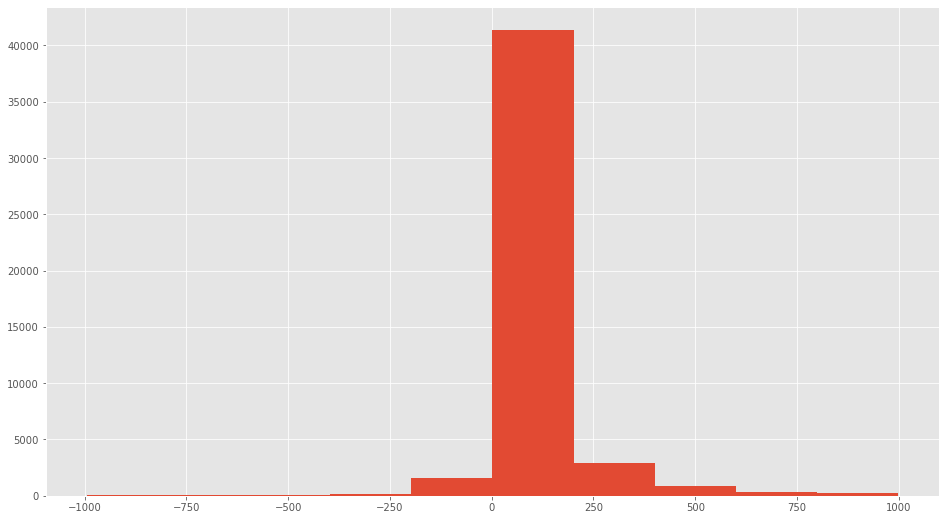

In [219]:
#revisamos la distribucion del pago
frame["BILLING GROSS AMT"].hist()

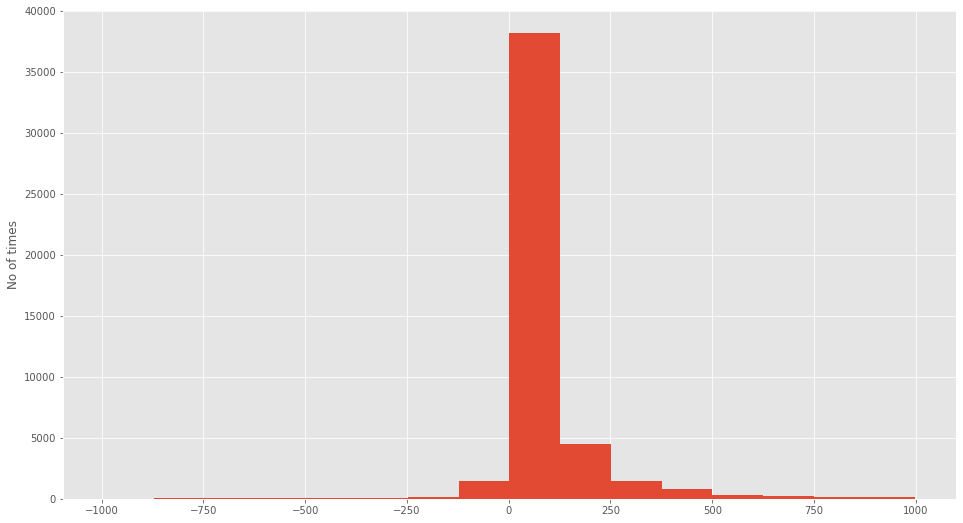

In [220]:
#le damos un numero de intervalos para verlo mejor
import matplotlib.pyplot as plt
plt.hist(frame["BILLING GROSS AMT"], bins=16)
#plt.hist(frame["BILLING GROSS AMT"], bins=[-1000.00, 0.00, 125.00, 250.00, 370.00,1000])
plt.ylabel('No of times')
plt.show()

In [223]:
import numpy as np
#df = pd.DataFrame(data=np.random.randint(1,10,10), columns=['a'])
criteria = [frame["BILLING GROSS AMT"].between(-1000.00, 0.00), frame["BILLING GROSS AMT"].between(0.00, 124.99), frame["BILLING GROSS AMT"].between(125.00, 249.99), frame["BILLING GROSS AMT"].between(250.00, 369.99), frame["BILLING GROSS AMT"].between(370.00, 1000.00)]
values = ['1. <0', '2. 0-125','3. 125-250' ,'4. 250-370','5. >370']

frame['BILLING RANGE'] = np.select(criteria, values)

In [224]:
# verificamos rango creado
set(frame['BILLING RANGE'])

{'0', '1. <0', '2. 0-125', '3. 125-250', '4. 250-370', '5. >370'}

In [225]:
#revisamos una de las vriables que clasifia a groso modo las transacciones
set(frame['Directorate'])

{'#N/D',
 'Adult & Communities',
 'Adult Social Care and Health',
 'Adults',
 'CYP&F',
 'CYP&F ',
 'CYP&F  ',
 'CYP&F SCHOOLS',
 'CYP&F Schools',
 'Corporate Resources',
 'DEVELOPMENT',
 'Development',
 'Local Services',
 'Local services'}

In [226]:
#creamos grupos mas reducidos
Groups=['Adult','CYP&F','Corporate Resources','Development','Local Services']
Groups_cat=pd.DataFrame(Groups)
Groups_cat

,0
0,Adult
1,CYP&F
2,Corporate Resources
3,Development
4,Local Services


In [227]:
#Luego creamos una nueva categoria mas reducida en base a la columna Directorate
pat = '('+'|'.join(Groups_cat[0].str.split().str[-1])+')'
frame['DIRECTORATE CAT'] = (frame['Directorate'].str.extract(pat)).fillna('other')
##frame[['category','Directorate']]

In [228]:
#revisamos nuevos valores creados en columna DIRECTORATE CAT
set(frame['DIRECTORATE CAT'])

{'Adult', 'CYP&F', 'Development', 'Resources', 'Services', 'other'}

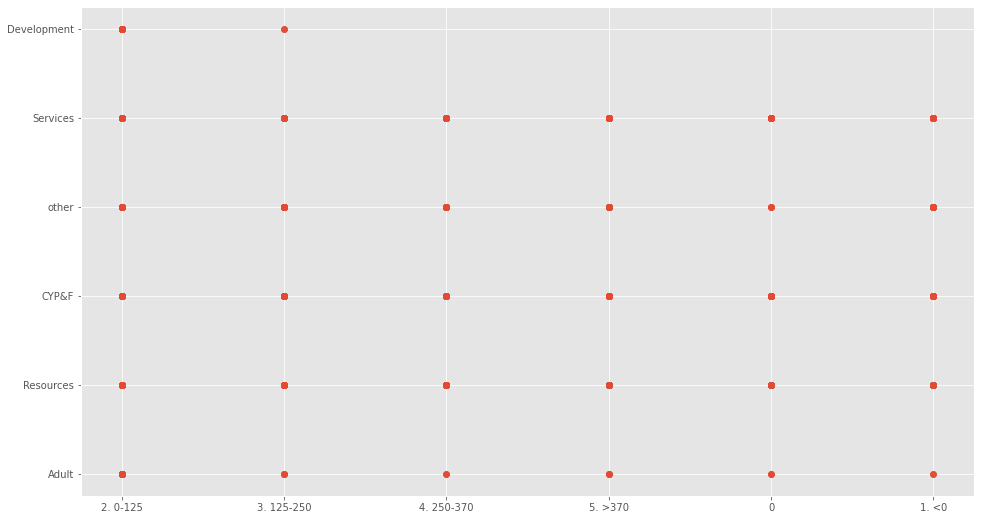

In [229]:
plt.scatter(frame['BILLING RANGE'], frame['DIRECTORATE CAT'], alpha=0.5)

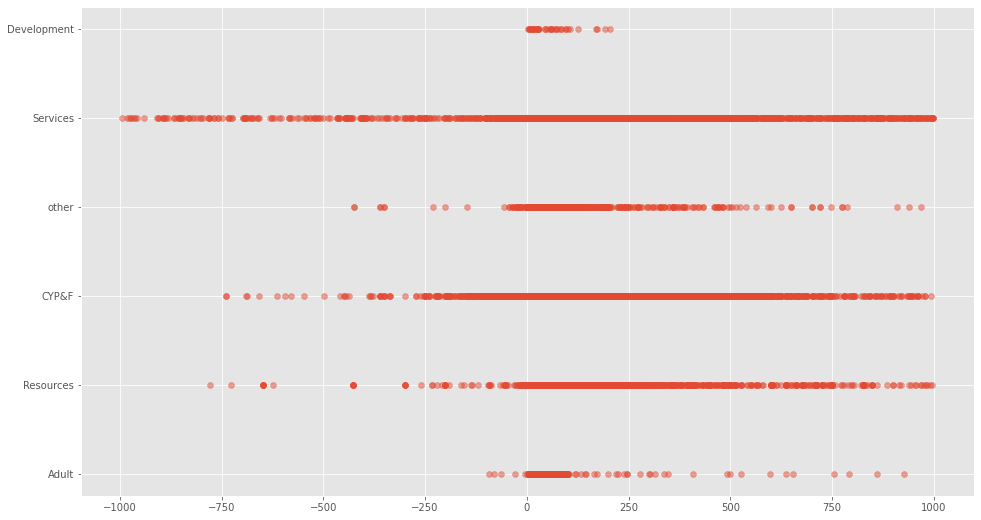

In [230]:
#nalizamos el pago con la nueva catgoria
plt.scatter(frame['BILLING GROSS AMT'], frame['DIRECTORATE CAT'], alpha=0.5)

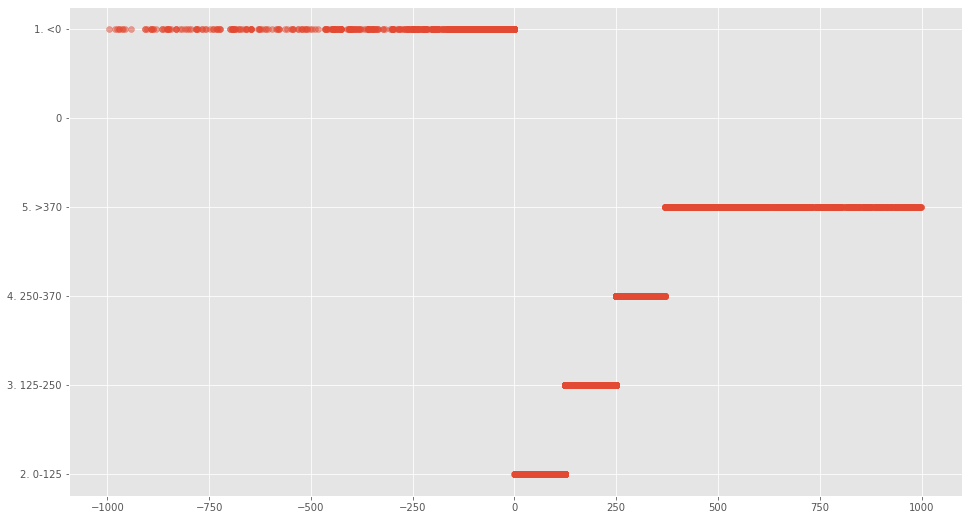

In [231]:
plt.scatter(frame['BILLING GROSS AMT'], frame['BILLING RANGE'], alpha=0.5)

In [232]:
#procedemos a elegir las columnas que utilizarenmos en el analisis de cluster
unscaled_data= frame[['BILLING GROSS AMT', 'DIRECTORATE CAT', 'BILLING RANGE']].copy()

In [233]:
#eliminamos valores nulos
#unscaled_data.dropna(inplace=True)
unscaled_data.shape

(48755, 3)

In [234]:
# Importamos label encoder 
from sklearn import preprocessing 
  
# label_encoder object entedera las palabras 
label_encoder = preprocessing.LabelEncoder() 
  
# Codificamos la columna DIRECTORATE CAT 
unscaled_data['DIRECTORATE CAT']= label_encoder.fit_transform(unscaled_data['DIRECTORATE CAT'].astype(str)) 

unscaled_data['DIRECTORATE CAT'].unique() 

array([0, 3, 1, 5, 4, 2])

In [235]:
# Codificamos la columna DIRECTORATE CAT 
unscaled_data['BILLING RANGE']= label_encoder.fit_transform(unscaled_data['BILLING RANGE'].astype(str)) 

unscaled_data['BILLING RANGE'].unique() 

array([2, 3, 4, 5, 0, 1])

# *NORMALIZAMOS VALORES*

In [236]:
#Nomralizando valores
# Import required modules
import pandas as pd
from sklearn import preprocessing
x = unscaled_data[['BILLING GROSS AMT', 'DIRECTORATE CAT', 'BILLING RANGE']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized

,0,1,2
0,0.535502,0.0,0.4
1,0.541972,0.0,0.4
2,0.504145,0.0,0.4
3,0.509116,0.0,0.4
4,0.524162,0.0,0.4
...,...,...,...
48750,0.529724,0.8,0.4
48751,0.558733,0.8,0.4
48752,0.558733,0.8,0.4
48753,0.504100,0.8,0.4


In [238]:
df_normalized.columns = ['BILLING GROSS AMT SCALED', 'DIRECTORATE CAT SCALED', 'BILLING RANGE SCALED']
df_normalized.head()

,BILLING GROSS AMT SCALED,DIRECTORATE CAT SCALED,BILLING RANGE SCALED
0,0.535502,0.0,0.4
1,0.541972,0.0,0.4
2,0.504145,0.0,0.4
3,0.509116,0.0,0.4
4,0.524162,0.0,0.4


In [242]:
features=frame[['BILLING GROSS AMT', 'DIRECTORATE CAT', 'BILLING RANGE']].copy()
scaled_data = pd.merge(df_normalized, features, right_index=True, left_index=True)

In [243]:
#df_normalized.dropna(inplace=True)
scaled_data.dropna(inplace=True)
scaled_data.shape

(41976, 6)

In [244]:
scaled_data.columns.values

array(['BILLING GROSS AMT SCALED', 'DIRECTORATE CAT SCALED',
       'BILLING RANGE SCALED', 'BILLING GROSS AMT', 'DIRECTORATE CAT',
       'BILLING RANGE'], dtype=object)

# *CREAMOS EL MODELO KMEANS*

In [245]:
#Armando los predictores
import numpy as np
X = np.array(scaled_data[['BILLING GROSS AMT SCALED','BILLING RANGE SCALED']])
y = np.array(scaled_data['DIRECTORATE CAT SCALED'])
X.shape

(41976, 2)

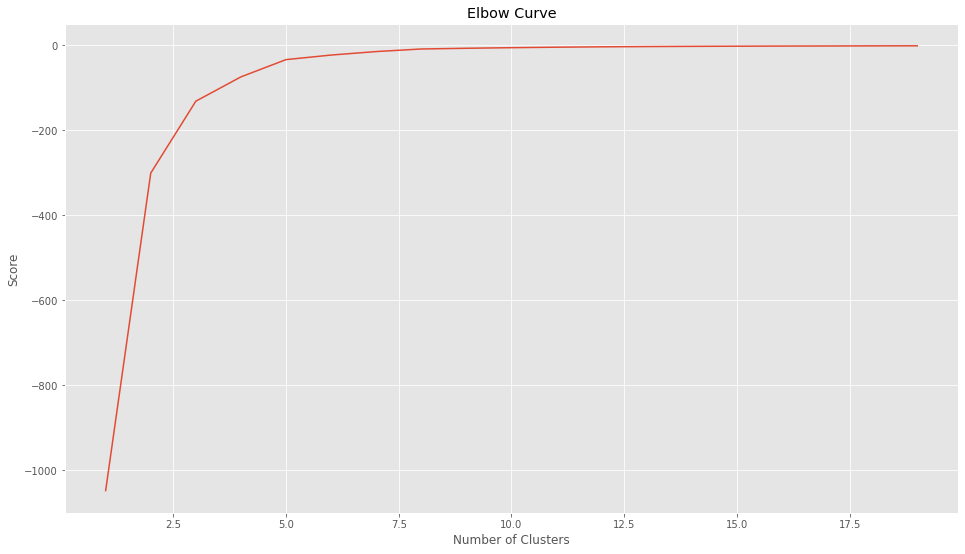

In [246]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

#Evaluando el mejor cluster
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# *ESCOGEMOS 4 CLUSTERS*

In [247]:
#sacamos los centroides con 4 clusters
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.51792279 0.4       ]
 [0.72080015 0.90714286]
 [0.58786867 0.6       ]
 [0.43796502 0.2       ]]


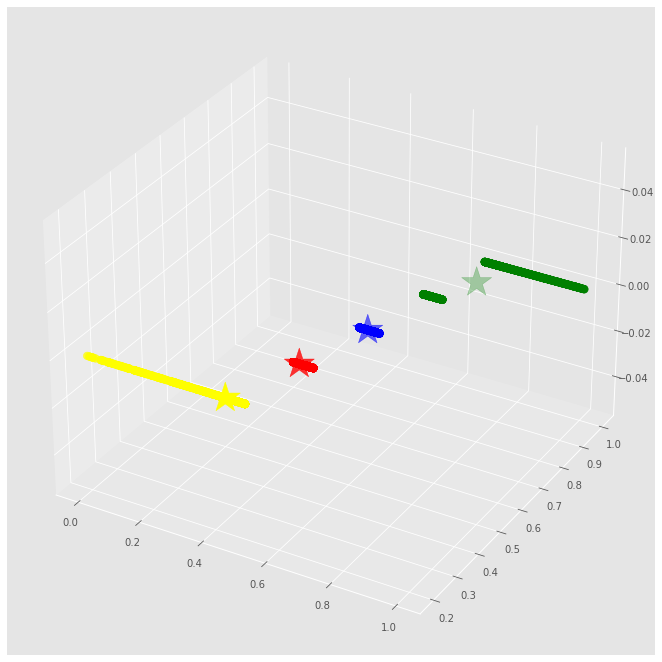

In [248]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1],  c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1],   marker='*', c=colores, s=1000)

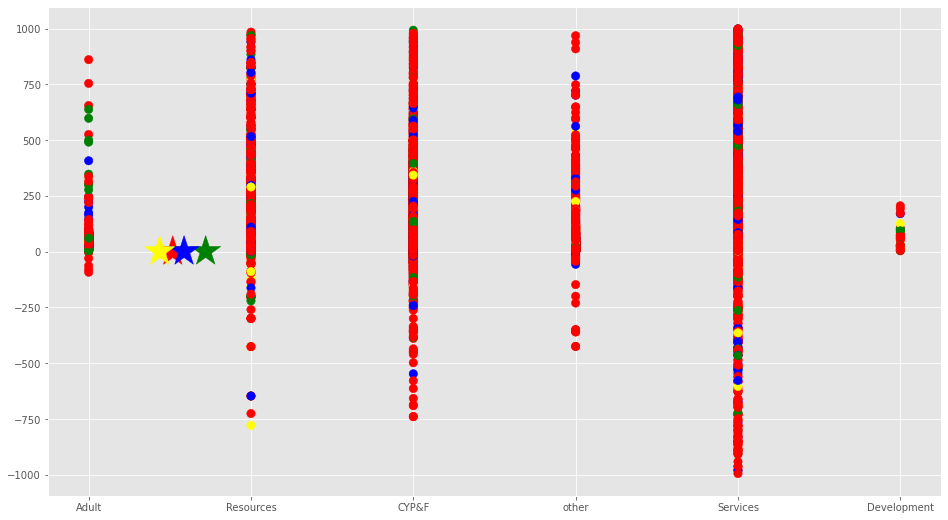

In [249]:
# 2d Graph
f1 = scaled_data['DIRECTORATE CAT'].values
f2 = scaled_data['BILLING GROSS AMT'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

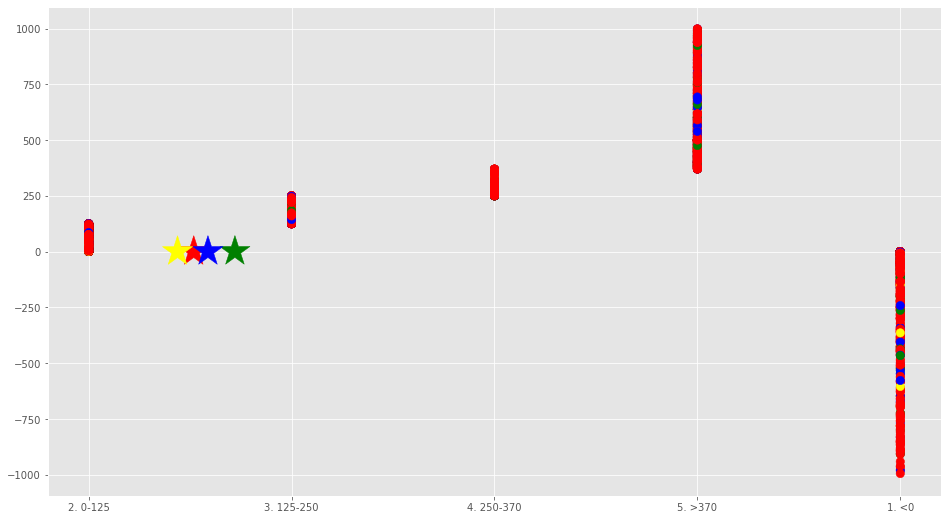

In [250]:
# 2d Graph
f1 = scaled_data['BILLING RANGE'].values
f2 = scaled_data['BILLING GROSS AMT'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

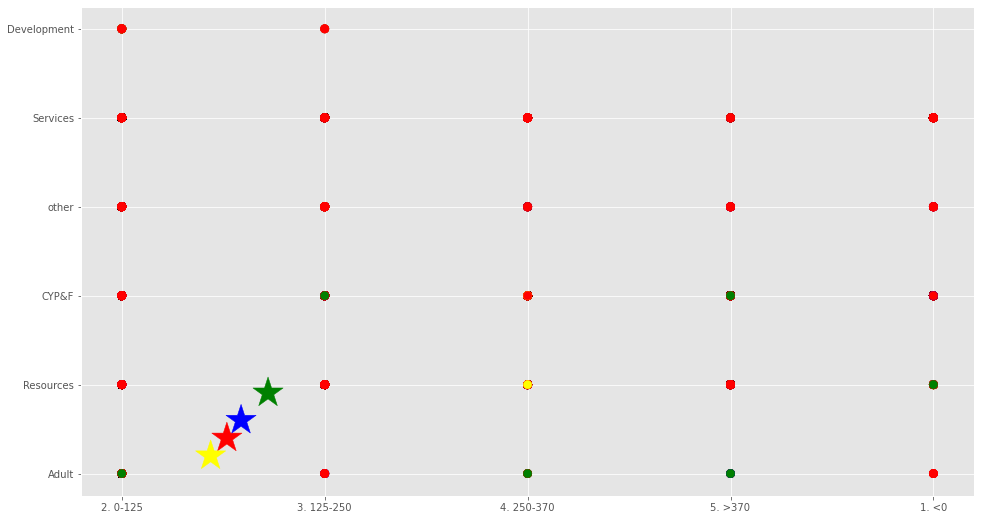

In [251]:
# 2d Graph
f1 = scaled_data['BILLING RANGE'].values
f2 = scaled_data['DIRECTORATE CAT'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

# *ESCOGEMOS 3 CLUSTERS*

In [257]:
#sacamos los centroides con 3 clusters
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.51502204 0.39274429]
 [0.72080015 0.90714286]
 [0.58786867 0.6       ]]


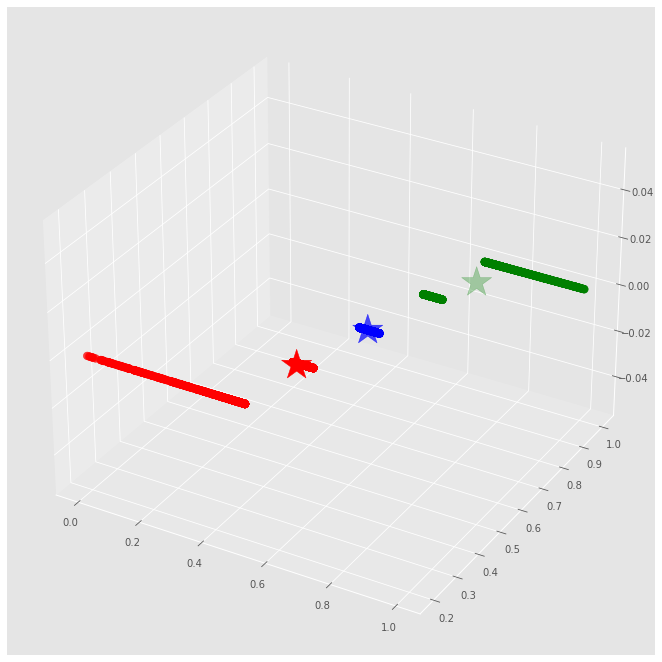

In [258]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1],  c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1],   marker='*', c=colores, s=1000)

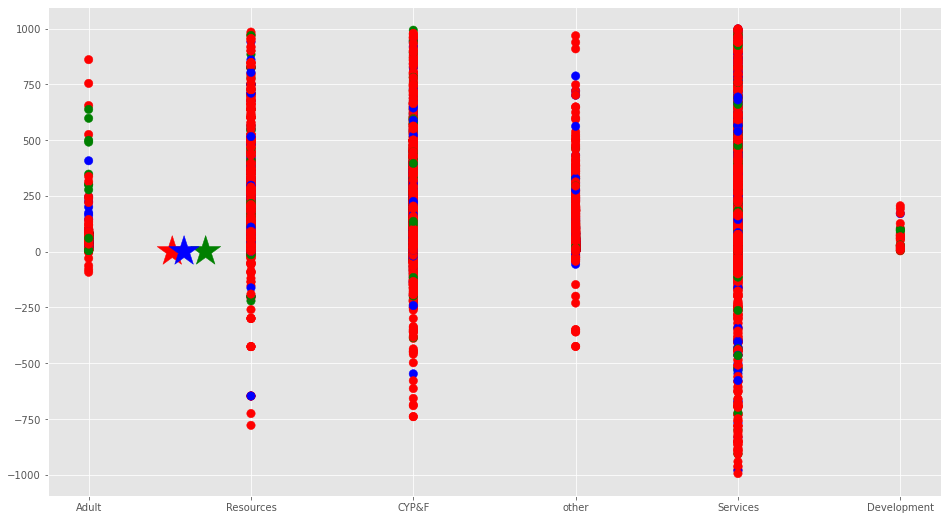

In [259]:
f1 = scaled_data['DIRECTORATE CAT'].values
f2 = scaled_data['BILLING GROSS AMT'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

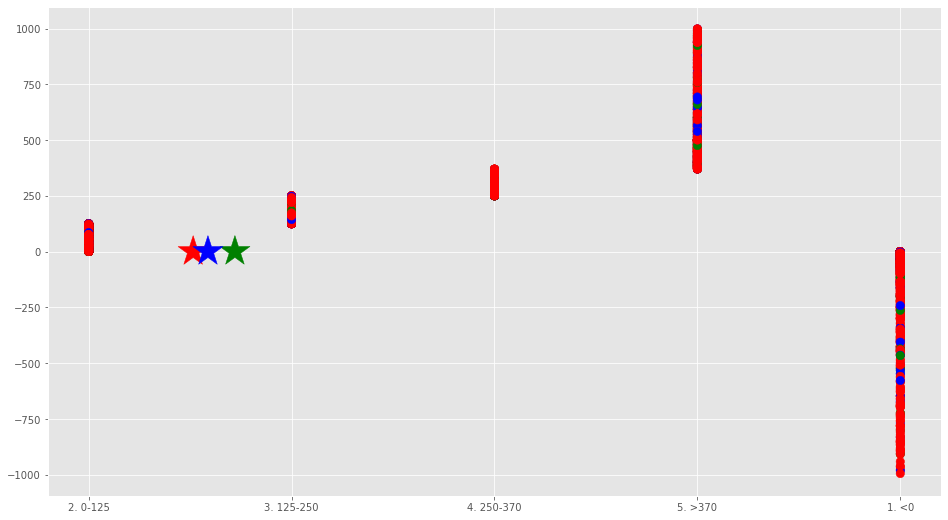

In [260]:
# 2d Graph
f1 = scaled_data['BILLING RANGE'].values
f2 = scaled_data['BILLING GROSS AMT'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

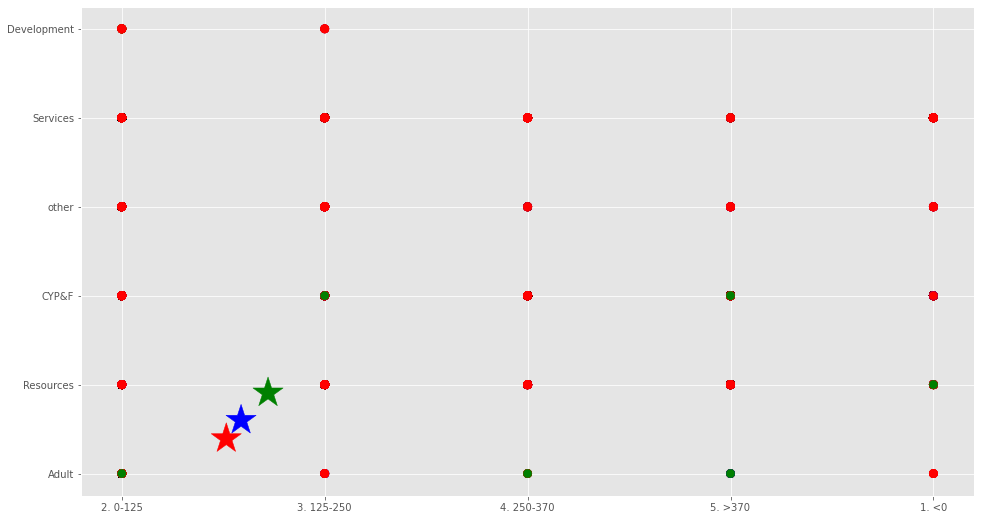

In [261]:
# 2d Graph
f1 = scaled_data['BILLING RANGE'].values

f2 = scaled_data['DIRECTORATE CAT'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

# *CONCLUSIONES*

Se puede observar que las transacciones se acoplan mejor con 4 clusters, debido a que muestran mejor que el monto promedio pagado menores a $370 estan en el grupo de CYP&Family. En cambio el grupo de Corporate Resources y Adult & Communities estan el rango de 0 a $250 como maximo. Finalmente los grupos que llegan a mas de $370 por transaccion en promedio son Development y Local Services